# Ejercicio 5

In [366]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [367]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron
from matplotlib import pylab as plt

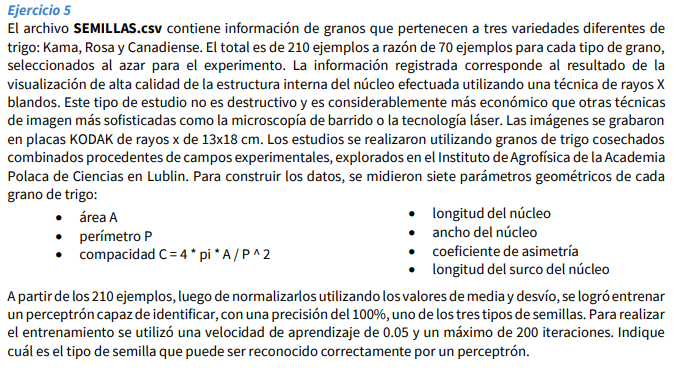

In [368]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos

nombre_archivo = DATOS_DIR + 'SEMILLAS.csv' # archivo de drogas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
#print(df)
display(df)

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


In [369]:
mapeo1 = {
    "Clase": {"Tipo1": 1, "Tipo2":0, "Tipo3":0}
}
mapeo2 = {
    "Clase": {"Tipo1": 0, "Tipo2":1, "Tipo3":0}
}
mapeo3 = {
    "Clase": {"Tipo1": 0, "Tipo2":0, "Tipo3":1}
}

df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

df1.replace(mapeo1, inplace=True)
df2.replace(mapeo2, inplace=True)
df3.replace(mapeo3, inplace=True)
display(df1)
display(df2)
display(df3)

C:\Users\ivanb\AppData\Local\Temp\ipykernel_21920\1267493712.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(mapeo1, inplace=True)
C:\Users\ivanb\AppData\Local\Temp\ipykernel_21920\1267493712.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace(mapeo2, inplace=True)
C:\Users\ivanb\AppData\Local\Temp\ipykernel_21920\1267493712.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,0


,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,0


,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,1


In [370]:
X = np.array(df.iloc[:,:-1]) #Los datos siempre son los mismos

#Una salida esperada para cada tipo
T_tipo1 = np.array((df1["Clase"]))
T_tipo2 = np.array((df2["Clase"]))
T_tipo3 = np.array((df3["Clase"]))


In [371]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_tipo1_train, X_tipo1_test, T_tipo1_train, T_tipo1_test = model_selection.train_test_split(X, T_tipo1, test_size=0.30, random_state=42)

X_tipo2_train, X_tipo2_test, T_tipo2_train, T_tipo2_test = model_selection.train_test_split(X, T_tipo2, test_size=0.30, random_state=42)

X_tipo3_train, X_tipo3_test, T_tipo3_train, T_tipo3_test = model_selection.train_test_split(X, T_tipo3, test_size=0.30, random_state=42)

In [372]:
#Normaliza utilizando la media y el desvio
normalizador= preprocessing.StandardScaler()
    
X_tipo1_train = normalizador.fit_transform(X_tipo1_train)
X_tipo1_test = normalizador.transform(X_tipo1_test)

X_tipo2_train = normalizador.fit_transform(X_tipo2_train)
X_tipo2_test = normalizador.transform(X_tipo2_test)

X_tipo3_train = normalizador.fit_transform(X_tipo3_train)
X_tipo3_test = normalizador.transform(X_tipo3_test)



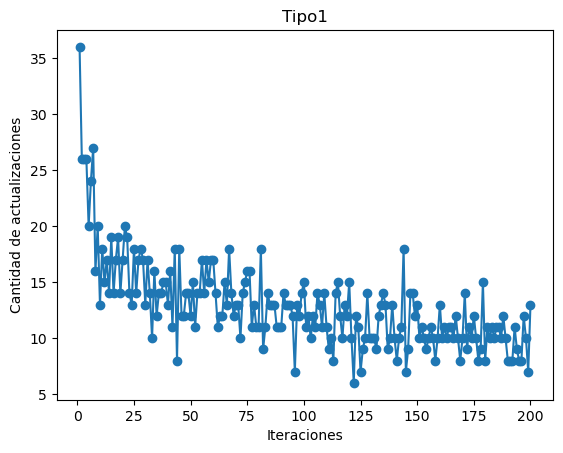

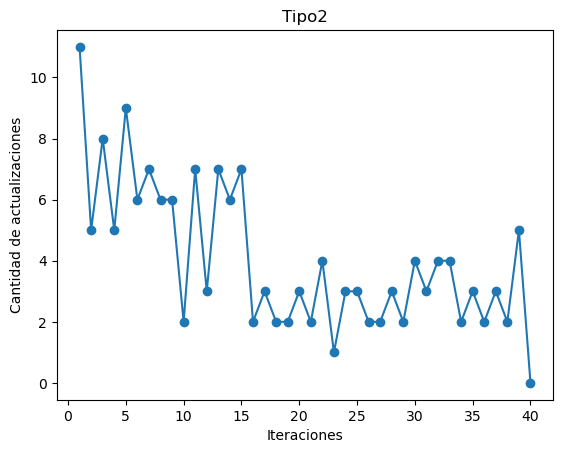

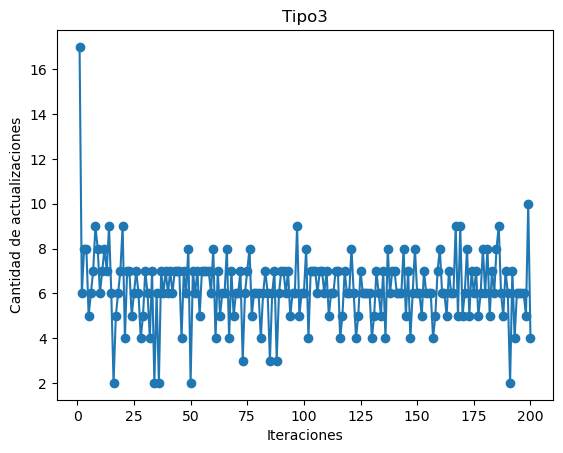

In [373]:
ppn_tipo1 = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_tipo1.fit(X_tipo1_train, T_tipo1_train)

ppn_tipo2 = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_tipo2.fit(X_tipo2_train, T_tipo2_train)

ppn_tipo3 = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn_tipo3.fit(X_tipo3_train, T_tipo3_train)

plt.plot(range(1, len(ppn_tipo1.errors_) + 1), ppn_tipo1.errors_, marker='o')
plt.title('Tipo1')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

plt.plot(range(1, len(ppn_tipo2.errors_) + 1), ppn_tipo2.errors_, marker='o')
plt.title('Tipo2')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

plt.plot(range(1, len(ppn_tipo3.errors_) + 1), ppn_tipo3.errors_, marker='o')
plt.title('Tipo3')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [374]:
Y_pred = ppn_tipo1.predict(X_tipo1_test)
print(Y_pred)
print(T_tipo1_test)

aciertos = sum(Y_pred == T_tipo1_test)
print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" %(100*aciertos/X_tipo1_test.shape[0]))

Y_pred = ppn_tipo2.predict(X_tipo2_test)
aciertos = sum(Y_pred == T_tipo2_test)
print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" %(100*aciertos/X_tipo2_test.shape[0]))

Y_pred = ppn_tipo3.predict(X_tipo3_test)
aciertos = sum(Y_pred == T_tipo3_test)
print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" %(100*aciertos/X_tipo3_test.shape[0]))

[1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0]
[1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0]
aciertos =  58
% de aciertos = 92.06 %
aciertos =  62
% de aciertos = 98.41 %
aciertos =  58
% de aciertos = 92.06 %


In [375]:
from sklearn import metrics
aciertos = metrics.accuracy_score(T_tipo1_test,Y_pred)
print("%% accuracy = %.3f" % aciertos)

report = metrics.classification_report(T_tipo1_test,Y_pred)
print(report)

MM = metrics.confusion_matrix(T_tipo1_test,Y_pred)
print("Matriz de confusión:\n%s" % MM)

% accuracy = 0.413
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        43
           1       0.13      0.15      0.14        20

    accuracy                           0.41        63
   macro avg       0.35      0.34      0.35        63
weighted avg       0.43      0.41      0.42        63

Matriz de confusión:
[[23 20]
 [17  3]]
